<a href="https://colab.research.google.com/github/ISL-0111/Mini_PJT_9_Clound_Hosted_Notebook_Data_Manipulation_ISL/blob/main/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of employees attrition


## Requirements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [ ]:
# Load dataset using Pandas
def load_data(file_path, encoding="utf-8"):
    return pd.read_csv(file_path, encoding=encoding)

# Explore data
def explore_data(df):
    full_desc = df.describe().T
    print(full_desc)

if __name__ == "__main__":
    file_path = "https://raw.githubusercontent.com/nogibjj/Mini_PJT_9_Cloud-Hosted-Notebook-Data-Manipulation/refs/heads/main/file/HR.csv"
    ppl = load_data(file_path)

## Descriptive Analysis

                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.

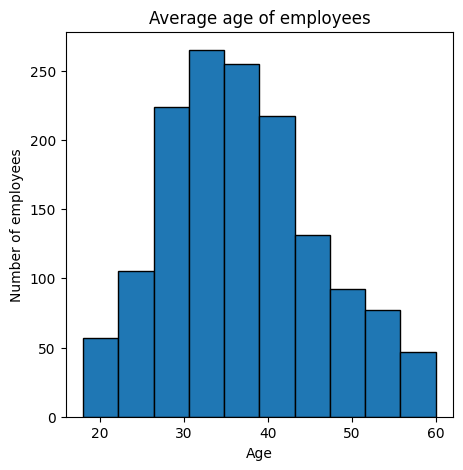

In [ ]:
# Calculate statistics for Age
def calculate_age_statistics(df):
    age_mean = df["Age"].mean()
    age_median = df["Age"].median()
    age_std = df["Age"].std()
    return age_mean, age_median, age_std

# Plot histogram for Age
def plot_age_histogram(df):
    plt.figure(figsize=(5, 5))
    plt.hist(df["Age"], bins=10, edgecolor="black")
    plt.title("Average age of employees")
    plt.xlabel("Age")
    plt.ylabel("Number of employees")
    plt.show()

# Print age statistics
def print_age_statistics(age_mean, age_median, age_std):
    print(f"Average age of employees is {round(age_mean, 1)}")
    print(f"Median age of employees is {round(age_median, 1)}")
    # Limit the precision of age_std to avoid precision mismatch issues
    print(f"Standard Deviation age of employees is {round(age_std, 3)}")

# Main function to execute
if __name__ == "__main__":
    explore_data(ppl)

    # Calculate and print age statistics
    age_mean, age_median, age_std = calculate_age_statistics(ppl)
    print_age_statistics(age_mean, age_median, age_std)

    # Plot histogram for Age
    plot_age_histogram(ppl)


## Data Visualization

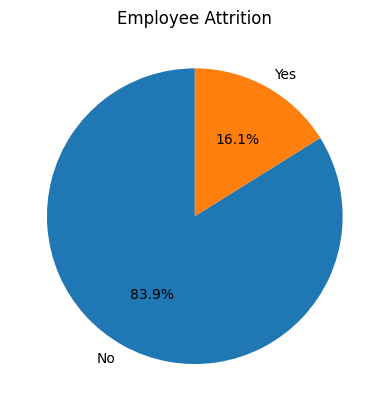

                        Attrition_No  Attrition_Yes  Percentage Attrition
Department                                                               
Human Resources                   51             12             19.047619
Research & Development           828            133             13.839750
Sales                            354             92             20.627803


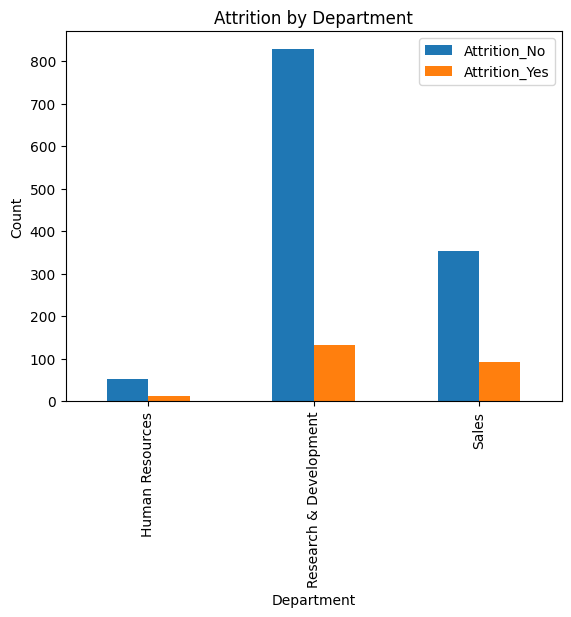

In [ ]:
# Load dataset using Pandas
def load_data(file_path, encoding="utf-8"):
    return pd.read_csv(file_path, encoding=encoding)

# Employee Attrition rate pie chart
def plot_attrition_pie_chart(df):
    attrition_counts = df["Attrition"].value_counts()
    plt.pie(
        attrition_counts,
        labels=attrition_counts.index,
        autopct="%1.1f%%",
        startangle=90,
    )
    plt.title("Employee Attrition")
    plt.show()

# Employee Attrition by department or other categories
def plot_attrition_by_department(df, col_name):
    temp_grp = df.groupby([col_name, "Attrition"]).size().unstack(fill_value=0)
    temp_grp.columns = ["Attrition_No", "Attrition_Yes"]
    temp_grp["Percentage Attrition"] = (
        temp_grp["Attrition_Yes"]
        / (temp_grp["Attrition_Yes"] + temp_grp["Attrition_No"])
    ) * 100
    print(temp_grp)

    temp_grp[["Attrition_No", "Attrition_Yes"]].plot(
        kind="bar",
        stacked=False,
    )
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.title(f"Attrition by {col_name}")
    plt.show()

if __name__ == "__main__":
    file_path = "https://raw.githubusercontent.com/nogibjj/Mini_PJT_9_Cloud-Hosted-Notebook-Data-Manipulation/refs/heads/main/file/HR.csv"
    ppl = load_data(file_path)

    plot_attrition_pie_chart(ppl)
    plot_attrition_by_department(ppl, "Department")
